In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

# adds scripts/ and src/ folder: so you can import scripts/functions across project steps
import sys 
sys.path.append("../../src")
sys.path.append("../../scripts")

# import data filepath we want to use
from data_filepaths import all_data_info, portraits_csv, casestudy_csv

In [2]:
df = pd.read_csv(all_data_info)

In [3]:
y = []
def correct_date(x):
    try:
        return float(str(x).replace('c.', ''))
    except ValueError:
        return np.nan

In [4]:
df['date'] = df['date'].apply(correct_date)

In [5]:
df.head()

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
0,Barnett Newman,1955.0,abstract,15530.0,6911.0,9201912.0,wikiart,Color Field Painting,Uriel,train_only,True,102257.jpg
1,Barnett Newman,1950.0,abstract,14559.0,6866.0,8867532.0,wikiart,Color Field Painting,Vir Heroicus Sublimis,train_only,True,75232.jpg
2,kiri nichol,2013.0,NaN,9003.0,9004.0,1756681.0,NaN,Neoplasticism,NaN,test_only,False,32145.jpg
3,kiri nichol,2013.0,NaN,9003.0,9004.0,1942046.0,NaN,Neoplasticism,NaN,test_only,False,20304.jpg
4,kiri nichol,2013.0,NaN,9003.0,9004.0,1526212.0,NaN,Neoplasticism,NaN,test_only,False,836.jpg


In [6]:
sum([z<1800 for z in y])

0

In [7]:
df.genre.value_counts()
# portrait
# self-portrait

portrait                    16847
landscape                   15006
genre painting              14260
abstract                     9498
religious painting           7429
cityscape                    5348
sketch and study             3644
illustration                 3202
still life                   3132
symbolic painting            2545
nude painting (nu)           2290
figurative                   2244
design                       2024
mythological painting        1910
marina                       1805
flower painting              1606
animal painting              1571
self-portrait                1531
allegorical painting         1034
history painting              879
interior                      670
literary painting             558
battle painting               358
wildlife painting             327
poster                        286
capriccio                     236
veduta                        233
caricature                    231
cloudscape                    208
tessellation  

In [8]:
len(df.loc[(df.genre.isin(['portrait', 'self-portrait']))&(df.date<1800)])

3134

In [9]:
len(df.loc[df.genre.isin(['portrait', 'self-portrait'])])
len(df.loc[df.genre.isin(['portrait'])])

16847

In [10]:

len(df.loc[(df.genre.isin(['religious painting']))&(df.date<1800)])

4562

In [11]:

len(df.loc[(df.genre.isin(['landscape']))&(df.date<1800)])

398

In [12]:
 
len(df.loc[(df.genre.isin(['genre painting']))&(df.date<1800)])

1158

<AxesSubplot:>

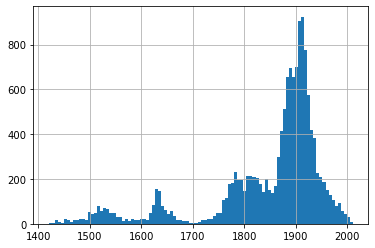

In [14]:
df.loc[(df.genre.isin(['portrait', 'self-portrait']))].date.hist(bins=100)

In [15]:
df.to_csv(casestudy_csv.replace("<CASESTUDY>", "all"))

In [16]:
df.loc[(df.genre.isin(['portrait', 'selfportrait']))].sort_values('date')[2200:2240]

KeyError: 'correcteddate'

In [ ]:
portraits = df.loc[(df.genre.isin(['portrait', 'self-portrait']))].sort_values('correcteddate')

In [ ]:
portraits.shape

In [ ]:
len(portraits.artist.unique())

In [ ]:
portraits["style"].value_counts().to_csv("styles.csv")

In [ ]:
portraits.to_csv(portraits_csv)

In [ ]:
portraits.groupby('style').size().plot(kind='pie', autopct='%.2f');

In [ ]:
portraits.groupby('source').size().plot(kind='pie', autopct='%.2f');

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(portraits[portraits["style"]=="Realism"].date,bins=100, alpha=0.5)
plt.hist(portraits[portraits["style"]=="Rococo"].date,bins=100, alpha=0.5)
plt.hist(portraits[portraits["style"]=="Expressionism"].date,bins=100, alpha=0.5)
plt.hist(portraits[portraits["style"]=="Impressionism"].date,bins=100, alpha=0.5)
plt.hist(portraits[portraits["style"]=="Romanticism"].date,bins=100, alpha=0.5)
plt.legend(['Realism', 'Rococo','Expressionism','Impressionism','Romanticism'])
plt.show()

In [ ]:
import os
path = "../../data/painter_nationality"
nationality = pd.DataFrame()
for filename in os.listdir(path):
    f = os.path.join(path, filename)
    # checking if it is a file
    if os.path.isfile(f):
        print(filename)
    if f.endswith(".json"):
        df = pd.read_json(f)
        nationality = pd.concat([nationality, df])

In [ ]:
import unicodedata

def strip_accents(text):
    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text)

In [ ]:
nationality = nationality.rename(columns={"painterLabel": "artist", "countryLabel": "nationality"})
nationality["artist"] = nationality["artist"].apply(strip_accents)
nationality.head()

In [ ]:
portraits = portraits.merge(nationality, on='artist', how='left')

In [ ]:
portraits.groupby('nationality').size().plot(kind='pie', autopct='%.2f');